In [24]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn import svm
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
mydata = pd.read_csv("./data/Airbnb_Cleaned.csv")
mydata = mydata[(mydata.price <= 1000) & (mydata.price != 0)]
mydata.head(10)

,accommodates,bathrooms,bedrooms,beds,guests_included,host_profile_pic,identity_verified,latitude,longitude,price,...,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,number_hotels,hotel_meanprice,hotel_maxprice,hotel_minprice,num_res
0,3,1.0,1.0,2.0,2,t,t,40.799205,-73.953676,59,...,0,0,1,0,0,1.0,129.000000,129.0,129.0,83
1,4,1.0,1.0,3.0,1,t,t,40.647486,-73.972370,149,...,1,0,0,0,0,1.0,106.000000,106.0,106.0,612
2,2,1.0,0.0,1.0,2,t,t,40.753621,-73.983774,225,...,0,0,1,0,0,39.0,334.769231,829.0,119.0,2108
3,2,1.0,1.0,1.0,2,t,t,40.708558,-73.942362,70,...,0,0,1,0,0,3.0,112.000000,144.0,76.0,280
4,2,1.0,1.0,1.0,2,t,t,40.809018,-73.941902,150,...,0,0,1,0,0,1.0,198.000000,198.0,198.0,343
5,2,1.0,1.0,1.0,2,t,f,40.747672,-73.974997,185,...,0,0,1,0,0,24.0,317.125000,561.0,102.0,1832
6,2,1.0,1.0,1.0,2,t,t,40.744958,-73.974201,129,...,0,0,1,0,0,24.0,317.125000,561.0,102.0,1832
7,2,1.0,1.0,1.0,1,t,f,40.764887,-73.984930,79,...,0,0,1,0,0,48.0,434.958333,1295.0,161.0,1580
8,1,1.0,1.0,1.0,1,t,t,40.801779,-73.967229,79,...,0,0,0,0,0,6.0,133.166667,187.0,50.0,938
9,3,1.0,1.0,2.0,2,t,t,40.713444,-73.990375,120,...,0,0,1,0,0,24.0,228.708333,395.0,72.0,1278


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36234 entries, 0 to 36440
Data columns (total 61 columns):
accommodates                   36234 non-null int64
bathrooms                      36234 non-null float64
bedrooms                       36234 non-null float64
beds                           36234 non-null float64
guests_included                36234 non-null int64
host_profile_pic               36234 non-null object
identity_verified              36234 non-null object
latitude                       36234 non-null float64
longitude                      36234 non-null float64
price                          36234 non-null int64
zipcode                        36234 non-null int64
Aparthotel                     36234 non-null int64
Apartment                      36234 non-null int64
Bed and breakfast              36234 non-null int64
Boat                           36234 non-null int64
Boutique hotel                 36234 non-null int64
Bungalow                       36234 non-null i

In [4]:
def arrangeCol(data):
    cols = list(data)
    cols.insert(len(cols), cols.pop(cols.index('price')))
    data = data.loc[:, cols]
    return data
mydata = arrangeCol(mydata)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


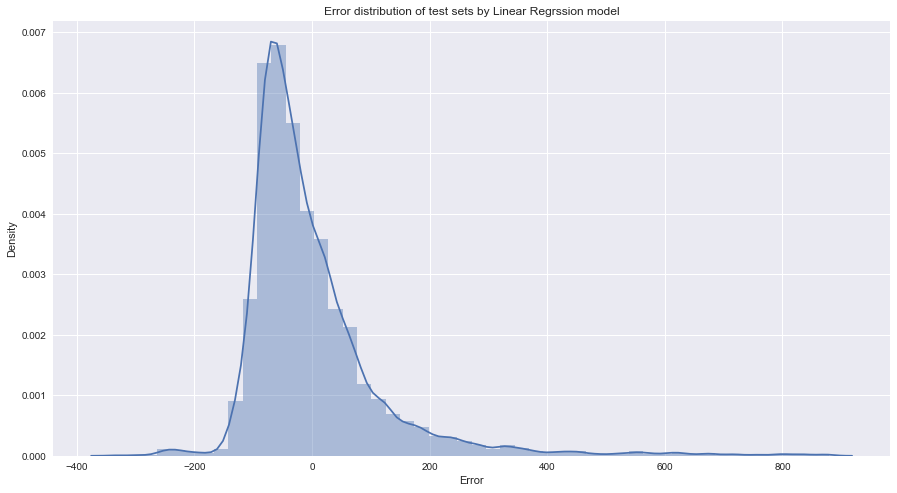

In [45]:
def linearRegression1(data):
    X = data[['hotel_meanprice']]
    y = data[['price']]
    X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    plt.figure(figsize=(15,8))
    ax = sns.distplot(y_test-predictions)
    ax.set(ylabel='Density', xlabel='Error', 
           title='Error distribution of test sets by Linear Regrssion model')
    plt.savefig("./plots/LRresults.png")
    
linearRegression1(mydata)

In [ ]:
def linearRegression2(data):
    X = data[['hotel_meanprice']]
    y = data[['price']]
    X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    plt.figure(figsize=(15,8))
    ax = sns.distplot(abs(y_test-predictions)/y_test)
    ax.set(ylabel='Percentage', xlabel='Mean Squared Error', 
           title='Error distribution of test sets by Linear Regrssion model')
    plt.savefig("./plots/LR_absolute_diff.png")
    
linearRegression2(mydata)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


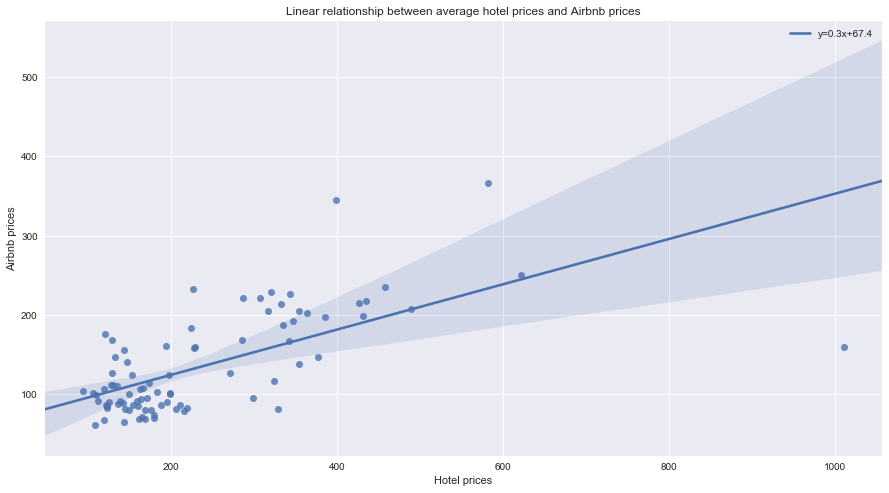

In [46]:
# find relationship between hotel average price and airbnb average price
def hotel_airbnb(data):
    output1 = data.groupby(['zipcode'])['price'].mean().reset_index()
    output1.columns = ['zipcode', 'averagePrice']
    output2 = data.groupby(['zipcode'])['hotel_meanprice'].mean().reset_index()
    output = pd.merge(output1, output2, on='zipcode')
    plt.figure(figsize=(15,8))
    # get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(output['hotel_meanprice'], output['averagePrice'])
    ax = sns.regplot(x='hotel_meanprice', y='averagePrice', data=output, 
                     line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    ax.set(xlabel='Hotel prices', ylabel='Airbnb prices', 
           title='Linear relationship between average hotel prices and Airbnb prices')
    ax.legend()
    plt.savefig("./plots/relationship_hotel_airbnb.png")
    
hotel_airbnb(mydata)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


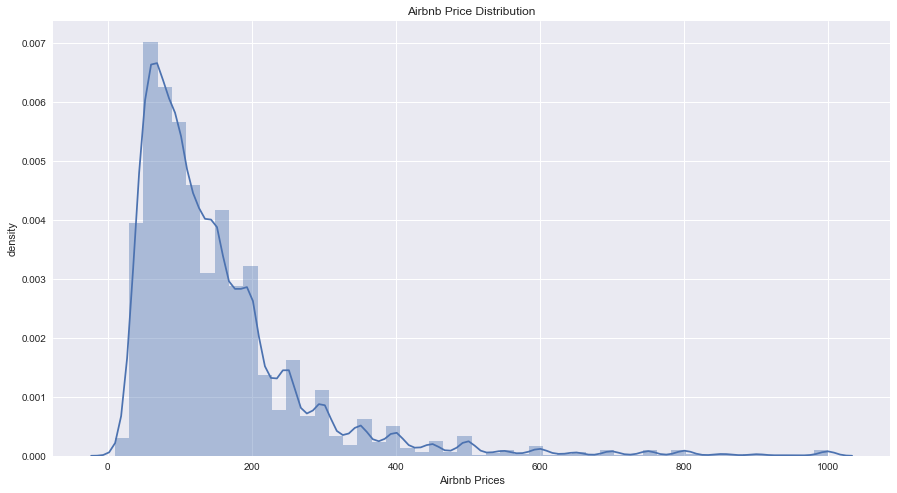

In [7]:
# find the distribution of airbnb price
def find_distribution(data):
    plt.figure(figsize=(15,8))
    ax = sns.distplot(data['price'])
    ax.set(ylabel='density', xlabel='Airbnb Prices', title='Airbnb Price Distribution')
    plt.savefig("./plots/airbnb_price_dist.png")
    
find_distribution(mydata)

In [39]:
def room_type_impact(data):
    entire_apt = np.array(data[data['Entire home/apt'] == 1]['price'])
    shared_room = np.array(data[data['Shared room'] == 1]['price'])
    private_room = np.array(data[data['Private room'] == 1]['price'])
    result = stats.f_oneway(entire_apt, private_room, shared_room)
    print(result)
room_type_impact(mydata)

F_onewayResult(statistic=5550.845537431362, pvalue=0.0)


In [8]:
print("Mean price for airbnb: ", np.mean(mydata['price']))
print("Max price for airbnb: ", max(mydata['price']))
print("Min price for airbnb: ", min(mydata['price']))

Mean price for airbnb:  151.11108351272287
Max price for airbnb:  1000
Min price for airbnb:  10


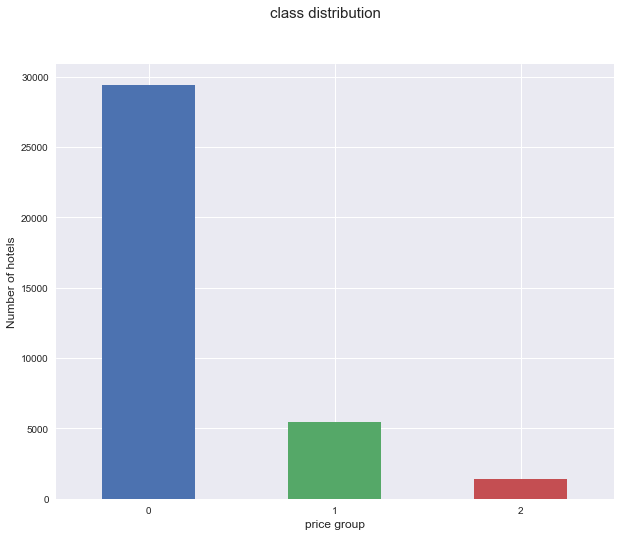

In [9]:
def preprocessing(data):
    price_dict = {'A': 0, 'B': 1, 'C': 2}
    data['price_group'] = pd.cut(data.price, bins=[0, 200, 400, 1000], labels=[0, 1, 2])
    cols = ['latitude', 'longitude', 'zipcode', 'price']
    data = data.drop(cols, axis=1)
    mydict = {'t': 1, 'f': 0}
    data = data.replace({'host_profile_pic': mydict})
    data = data.replace({'identity_verified': mydict})
    
    fig = plt.figure(figsize=(10, 8))
    mydata.groupby('price_group').price_group.count().plot.bar(ylim=0)
    fig.suptitle('class distribution', fontsize=15)
    plt.xlabel('price group', fontsize=12)
    plt.xticks(rotation='horizontal')
    plt.ylabel('Number of hotels', fontsize=12)
    fig.savefig('./plots/class_distribution.jpg')
    
    X = pd.DataFrame(data.iloc[:, 0:-1])
    y = pd.DataFrame(data.iloc[:, -1])
    y = y.values.ravel()
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_sample(X, y)
    col_names = data.columns.tolist()
    new_data = np.c_[X_res, np.transpose(y_res)]
    data = pd.DataFrame(new_data, columns = col_names)
    
    return data, price_dict

predic_data, price_dict = preprocessing(mydata)

In [52]:
def model_evaluation(y_test, y_pred, name):
    ## for confusion matrix
    # class info
    class_names = ['A', 'B', 'C'] 

    conf_mat = confusion_matrix(y_test, y_pred)
    
    print("========Confusion Matrix and Reprot of " + name + "==========")

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
    #sns.heatmap(conf_mat, annot=True, fmt='d')
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.setp(ax.get_yticklabels(), rotation=45)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    #plt.savefig('./plots/confusion-matrix' + name + '.png')
    
    ## for accuracy score
    print("Accuracy Score of " + name + "\n", accuracy_score(y_test, y_pred))
    
    ## for classification report
    print("Classification Report of " + name + "\n", classification_report(y_test, y_pred))

In [11]:
names = ['Naive Bayes', 'Decission Tree', 'KNN', 'SVM', 'Random Forest']
test_list = []
result_list = []

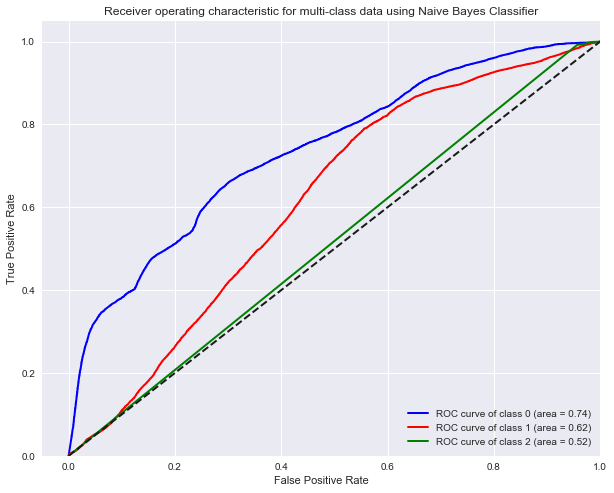

In [12]:
def naiveBayes(data):
    X = pd.DataFrame(data.iloc[:, 0:-1])
    y = pd.factorize(data['price_group'])[0]
    norm = Normalizer()
    X = norm.fit_transform(X)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    # Binarize the output
    y_bin = label_binarize(y, classes=[0, 1, 2])
    
    # define classifier
    clf = GaussianNB()
    
    # ROC curve
    y_score = cross_val_predict(clf, X, y, cv=10 ,method='predict_proba')
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['blue', 'red', 'green']
    plt.figure(figsize=(10, 8))
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data using Naive Bayes Classifier')
    plt.legend(loc="lower right")
    plt.savefig('./plots/naive_bayes_roc.png')
    plt.show()
    
    # model evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    clf.fit(X_train, y_train)
    
    # make predictions for test data and evaluate
    pred_y = clf.predict(X_test)
    
    return y_test, pred_y

nb_test, nb_pred = naiveBayes(predic_data)
test_list.append(nb_test)
result_list.append(nb_pred)

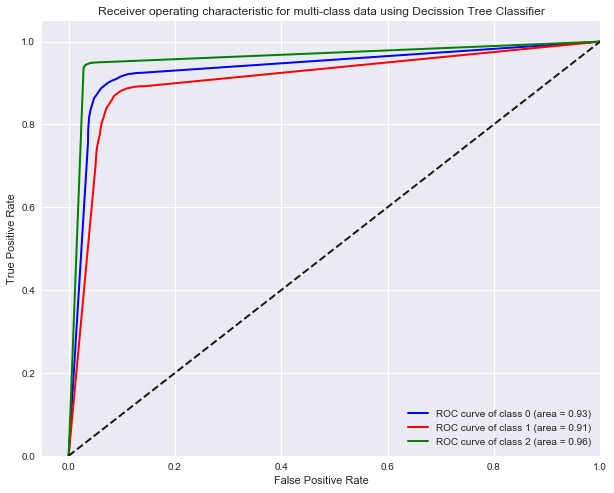

In [13]:
def decisionTree(data):
    X = pd.DataFrame(data.iloc[:, 0:-1])
    y = pd.factorize(data['price_group'])[0]
    norm = Normalizer()
    X = norm.fit_transform(X)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    # Binarize the output
    y_bin = label_binarize(y, classes=[0, 1, 2])
    
    # define classifier
    clf = DecisionTreeClassifier()
    
    # ROC curve
    y_score = cross_val_predict(clf, X, y, cv=10 ,method='predict_proba')
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['blue', 'red', 'green']
    plt.figure(figsize=(10, 8))
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data using Decision Tree Classifier')
    plt.legend(loc="lower right")
    plt.savefig('./plots/decision_tree_roc.png')
    plt.show()
    
    # model evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    clf.fit(X_train, y_train)
    
    # make predictions for test data and evaluate
    pred_y = clf.predict(X_test)
    
    return y_test, pred_y

dt_test, dt_pred = decissionTree(predic_data)
test_list.append(dt_test)
result_list.append(dt_pred)

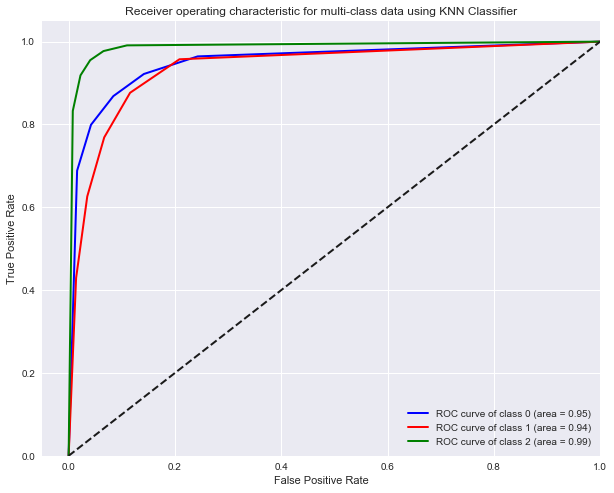

In [15]:
def KNN_classifier(data):
    X = pd.DataFrame(data.iloc[:, 0:-1])
    y = pd.factorize(data['price_group'])[0]
    norm = Normalizer()
    X = norm.fit_transform(X)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    # Binarize the output
    y_bin = label_binarize(y, classes=[0, 1, 2])
    
    # define classifier
    clf = KNeighborsClassifier(n_neighbors = 5)
    
    # ROC curve
    y_score = cross_val_predict(clf, X, y, cv=10 ,method='predict_proba')
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['blue', 'red', 'green']
    plt.figure(figsize=(10, 8))
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data using KNN Classifier')
    plt.legend(loc="lower right")
    plt.savefig('./plots/KNN_roc.png')
    plt.show()
    
    # model evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    clf.fit(X_train, y_train)
    
    # make predictions for test data and evaluate
    pred_y = clf.predict(X_test)
    
    return y_test, pred_y

knn_test, knn_pred = KNN_classifier(predic_data)
test_list.append(knn_test)
result_list.append(knn_pred)

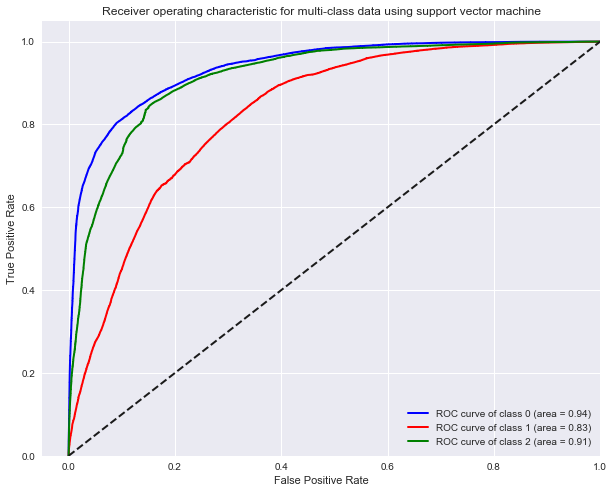

In [16]:
def svm_classifier(data):
    X = pd.DataFrame(data.iloc[:, 0:-1])
    y = pd.factorize(data['price_group'])[0]
    norm = Normalizer()
    X = norm.fit_transform(X)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    # Binarize the output
    y_bin = label_binarize(y, classes=[0, 1, 2])
    
    # define classifier
    clf = svm.SVC(gamma='auto', kernel='rbf',probability = True)
    
    # ROC curve
    y_score = cross_val_predict(clf, X, y, cv=10 ,method='predict_proba')
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['blue', 'red', 'green']
    plt.figure(figsize=(10, 8))
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data using support vector machine')
    plt.legend(loc="lower right")
    plt.savefig('./plots/svm_roc.png')
    plt.show()
    
    # model evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    clf.fit(X_train, y_train)
    
    # make predictions for test data and evaluate
    pred_y = clf.predict(X_test)
    
    return y_test, pred_y

svm_test, svm_pred = svm_classifier(predic_data)
test_list.append(svm_test)
result_list.append(svm_pred)

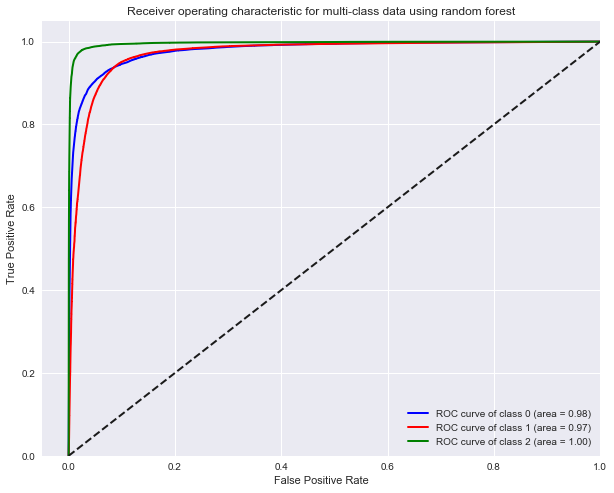

RFC Accuracy: 91.63%


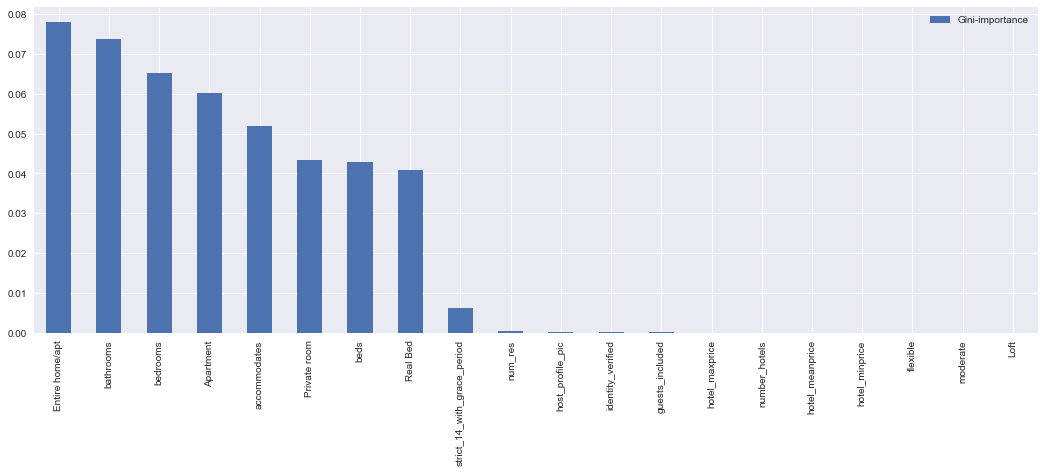

In [17]:
def random_forest(data):
    X = pd.DataFrame(data.iloc[:, 0:-1])
    y = pd.factorize(data['price_group'])[0]
    norm = Normalizer()
    X = norm.fit_transform(X)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    # Binarize the output
    y_bin = label_binarize(y, classes=[0, 1, 2])
    #n_classes = y_bin.shape[1]
    
    # define classifier
    clf = RandomForestClassifier(n_estimators=100)
    
    # ROC curve
    y_score = cross_val_predict(clf, X, y, cv=10 ,method='predict_proba')
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['blue', 'red', 'green']
    plt.figure(figsize=(10, 8))
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data using random forest')
    plt.legend(loc="lower right")
    plt.savefig('./plots/random_forest_roc.png')
    plt.show()
    
    # model evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    clf.fit(X_train, y_train)
    feat_labels = data.columns.tolist()
    feature_importance = list(zip(feat_labels, clf.feature_importances_))
    feature_importance = pd.DataFrame(feature_importance, columns = ['feature', 'importance'])
    feature_importance = feature_importance.sort_values(by = ['importance'], ascending = False)
    feature_importance.to_csv('./results/feature_importance_full.csv', index=False)
    
    # make predictions for test data and evaluate
    pred_y = clf.predict(X_test)
    predictions = [np.round(value) for value in pred_y]
    total_accuracy = accuracy_score(y_test, predictions)
    print("RFC Accuracy: %.2f%%" % (total_accuracy * 100.0))
    
    feats = {} # a dict to hold feature_name: feature_importance
    selectnumber = 20
    outcome = pd.read_csv('./results/feature_importance_full.csv')
    outcome = outcome['feature'][0:selectnumber]

    for feature, importance in zip(outcome[0:selectnumber], sorted(clf.feature_importances_[0:selectnumber],reverse = True)):
        feats[feature] = importance #add the name/value pair

    impo_plot = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    #impo_plot = impo_plot.sort_values(by='Gini-importance')

    impo_plot.sort_values(by='Gini-importance').plot(figsize=(18, 6), kind='bar').invert_xaxis()

    plt.savefig('./plots/gini_importance_selected.png')
    
    return y_test, pred_y
    
rf_test, rf_pred = random_forest(predic_data)
test_list.append(rf_test)
result_list.append(rf_pred)

========Confusion Matrix and Reprot of Naive Bayes==========
Accuracy Score of Naive Bayes
 0.3523654159869494
Classification Report of Naive Bayes
               precision    recall  f1-score   support

           0       0.81      0.06      0.11      7292
           1       0.56      0.00      0.01      7389
           2       0.34      0.99      0.51      7387

   micro avg       0.35      0.35      0.35     22068
   macro avg       0.57      0.35      0.21     22068
weighted avg       0.57      0.35      0.21     22068

========Confusion Matrix and Reprot of Decission Tree==========
Accuracy Score of Decission Tree
 0.884810585463114
Classification Report of Decission Tree
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      7292
           1       0.84      0.84      0.84      7389
           2       0.94      0.93      0.93      7387

   micro avg       0.88      0.88      0.88     22068
   macro avg       0.88      0.88      0.

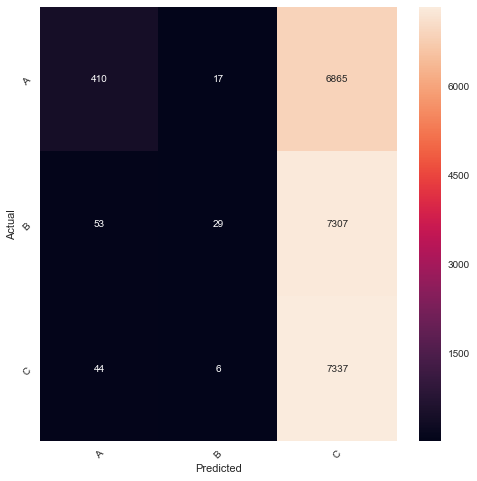

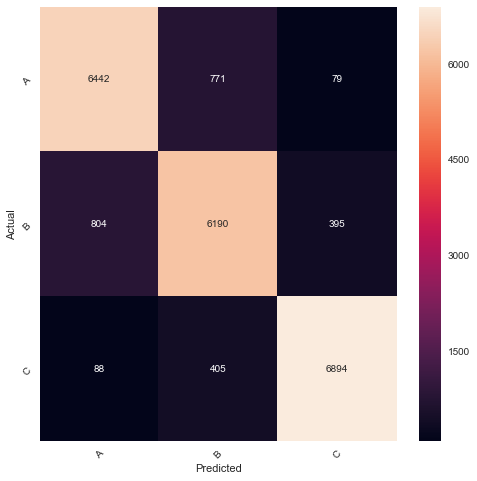

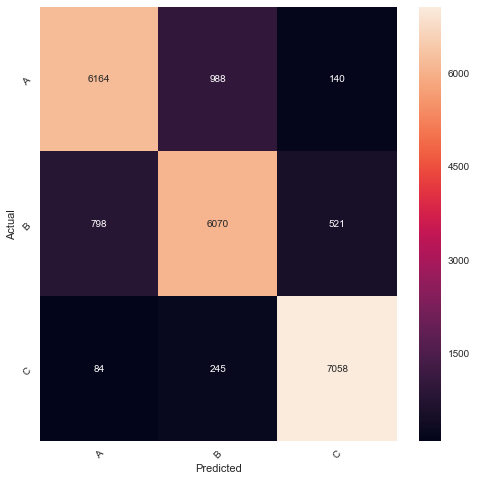

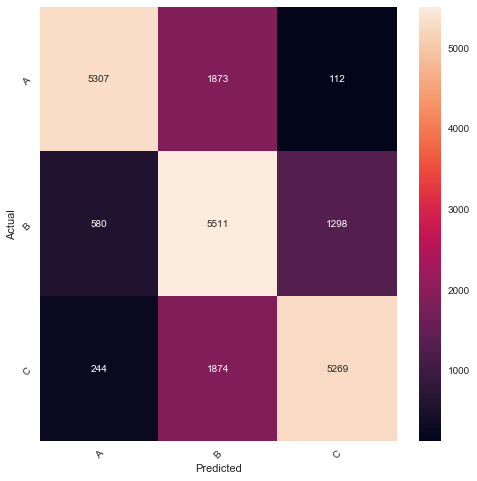

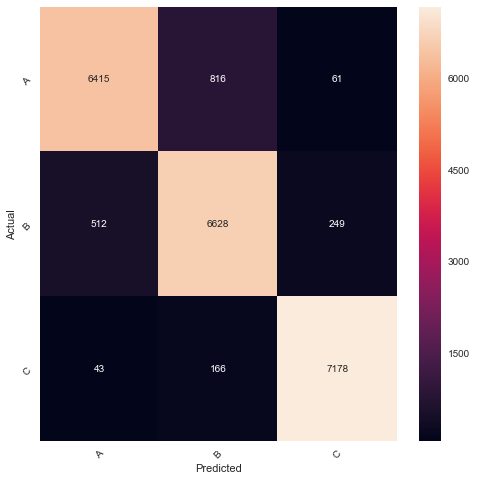

In [53]:
def generate_report(names, test_list, result_list):
    for i in range(len(names)):
        model_evaluation(test_list[i], result_list[i], names[i])
        
generate_report(names, test_list, result_list)